# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, how = "left", on = ["Mouse ID", "Mouse ID"])
# Display the data table for preview
combined_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [25]:
# Checking the number of mice.
total_mice = combined_data["Mouse ID"].nunique()
total_mice

249

In [26]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"])]["Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [27]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = combined_data[combined_data["Mouse ID"].isin(duplicate_mice)]
duplicate_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [28]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = combined_data[~combined_data["Mouse ID"].isin(duplicate_mice)]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [29]:
# Checking the number of mice in the clean DataFrame.
new_total_mice = clean_df["Mouse ID"].nunique()
new_total_mice

248

## Summary Statistics

In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_groups = clean_df.groupby("Drug Regimen")
summary_stats = drug_groups["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_stats = summary_stats.rename(columns={
    "mean" : "Mean Tumor Volume",
    "median" : "Median Tumor Volume",
    "var" : "Tumor Volume Variance",
    "std" : "Tumor Volume Std. Dev.",
    "sem" : "Tumor Volume Std. Err."
})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [31]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

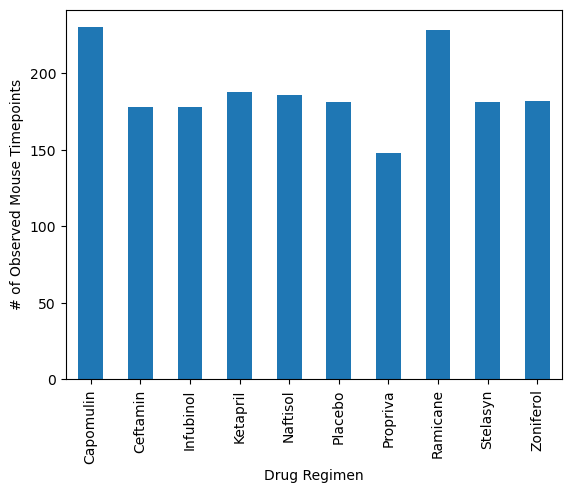

In [32]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_groups = clean_df.groupby("Drug Regimen").count()
drug_groups["Timepoint"].plot(kind = "bar", xlabel = "Drug Regimen", ylabel = "# of Observed Mouse Timepoints")
plt.show()

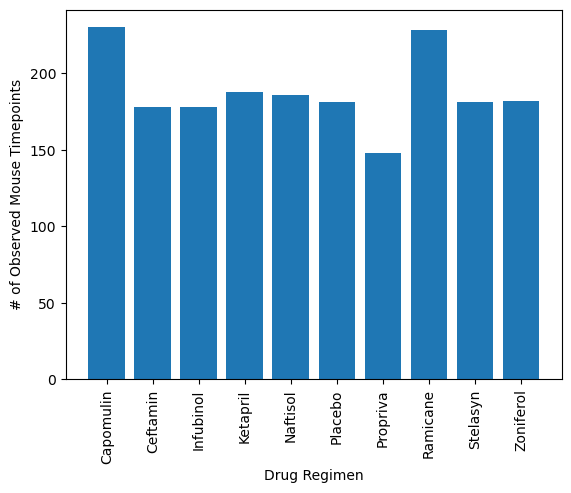

In [33]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_groups = clean_df.groupby("Drug Regimen").count()

plt.bar(drug_groups.index, drug_groups["Timepoint"])
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation = "vertical")
plt.show()

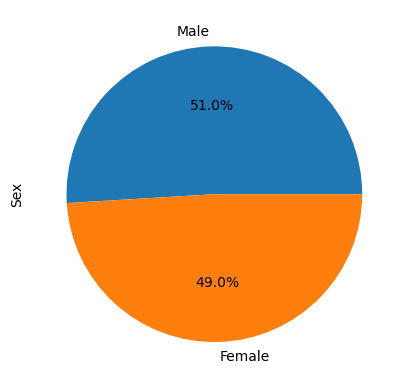

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_v_female = clean_df["Sex"].value_counts()

male_v_female.plot(kind="pie", autopct='%1.1f%%', ylabel = "Sex")

plt.show()


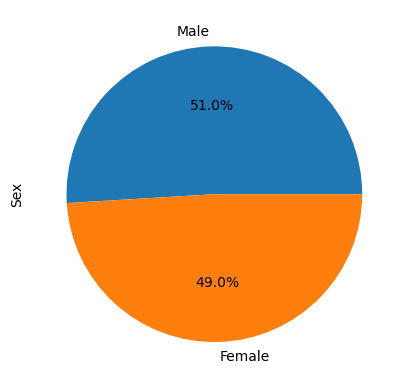

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_v_female = clean_df["Sex"].value_counts()

plt.pie(male_v_female, labels = male_v_female.index, autopct="%1.1f%%");
plt.ylabel("Sex");
plt.show()

## Quartiles, Outliers and Boxplots

In [36]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
sample_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Start by getting the last (greatest) timepoint for each mouse
final_timepoint = clean_df.groupby("Mouse ID")["Timepoint"].max()
final_tumor_data = clean_df[(clean_df["Drug Regimen"].isin(sample_regimens)) & 
                            (clean_df.set_index(["Mouse ID", "Timepoint"]).index.isin(final_timepoint.reset_index().set_index(["Mouse ID" , "Timepoint"]).index))]
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_volume = pd.merge (final_timepoint, final_tumor_data)
final_volume.reset_index(drop = True, inplace = True)
final_volume


,Timepoint,Mouse ID,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,45,n364,31.095335,1,Ramicane,Male,4,17
1,45,b128,38.982878,2,Capomulin,Female,9,22
2,45,l661,59.851956,3,Ceftamin,Male,18,26
3,45,y865,64.729837,3,Ceftamin,Male,23,26
4,45,y769,68.594745,4,Ceftamin,Female,6,27
...,...,...,...,...,...,...,...,...
8693,20,v719,54.048608,1,Infubinol,Female,17,30
8694,20,w193,50.005138,0,Infubinol,Male,22,30
8695,20,f966,30.485985,0,Capomulin,Male,16,17
8696,20,v719,54.048608,1,Infubinol,Female,17,30


In [37]:
# Put treatments into a list for for loop (and later for plot labels)
sample_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in sample_regimens:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    subset_df = final_volume.loc[final_volume["Drug Regimen"] == regimen]
    volumes = subset_df["Tumor Volume (mm3)"]
    tumor_volume.append(volumes)
    
    quartiles = volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = volumes[(volumes < lower_bound) | (volumes > upper_bound)]

    print(f"{regimen}'s potential outliers: tumor volumes below {lower_bound: .2f}, and tumor volumes above {upper_bound: .2f}")

    
   

    
    


Capomulin's potential outliers: tumor volumes below  20.70, and tumor volumes above  51.83
Ramicane's potential outliers: tumor volumes below  19.52, and tumor volumes above  50.38
Infubinol's potential outliers: tumor volumes below  54.56, and tumor volumes above  75.56
Ceftamin's potential outliers: tumor volumes below  52.18, and tumor volumes above  76.74


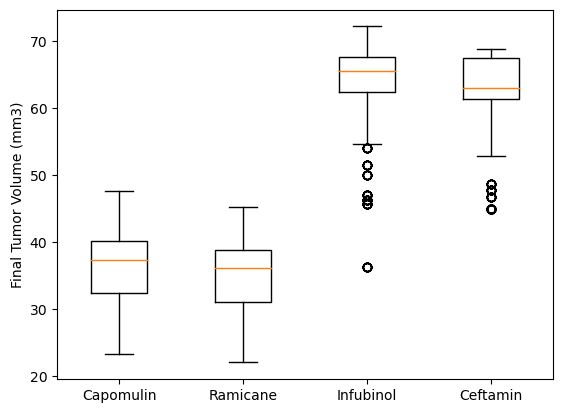

In [39]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_volume, labels = sample_regimens)
plt.show()

## Line and Scatter Plots

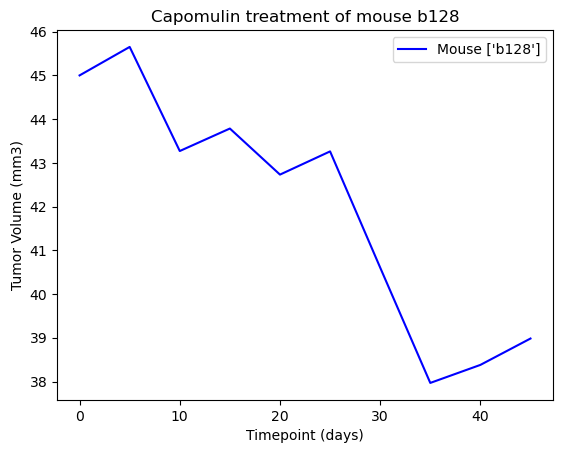

In [40]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
######## Mouse 1509/I509 did not exist within the data set, so a new mouse was chosen ######
sample_regimen = ["Capomulin"]
mouse_id = ["b128"]
mouse_data = clean_df[(clean_df["Drug Regimen"]. isin(sample_regimen)) & (clean_df["Mouse ID"].isin(mouse_id))]
time_points = mouse_data["Timepoint"]
tumor_volumes = mouse_data["Tumor Volume (mm3)"]

plt.plot(time_points, tumor_volumes, color = "b", label = f"Mouse {mouse_id}")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse b128")
plt.legend()
plt.show()


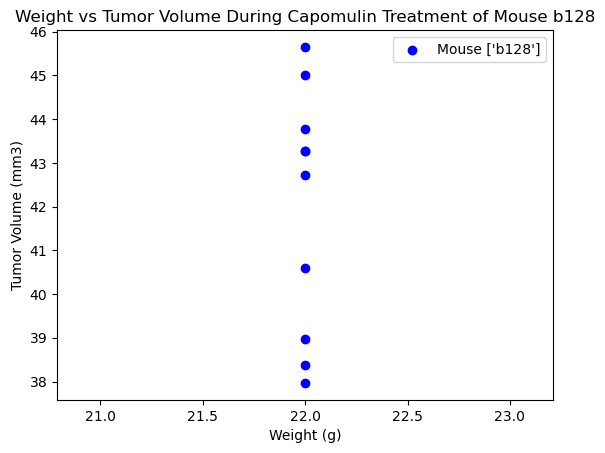

In [41]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
sample_regimen = ["Capomulin"]
mouse_id = ["b128"]


mouse_data_2 = clean_df[(clean_df["Drug Regimen"]. isin(sample_regimen)) & (clean_df["Mouse ID"].isin(mouse_id))]
mouse_weight = mouse_data_2["Weight (g)"]
tumor_volumes = mouse_data_2["Tumor Volume (mm3)"]
plt.scatter(mouse_weight, tumor_volumes, marker = "o", color = "b", label = f"Mouse {mouse_id}")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume During Capomulin Treatment of Mouse b128")
plt.legend()
plt.show()

## Correlation and Regression

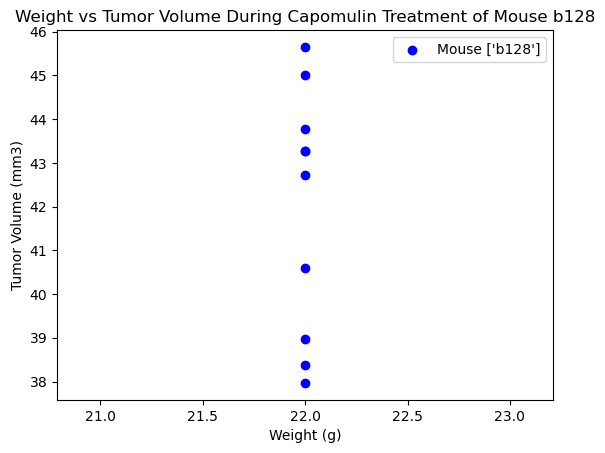

The correlation between mouse weight and the average tumor volume can not be calculated if all x-values are identical.


In [47]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
sample_regimen = ["Capomulin"]
mouse_id = ["b128"]


mouse_data_2 = clean_df[(clean_df["Drug Regimen"]. isin(sample_regimen)) & (clean_df["Mouse ID"].isin(mouse_id))]
mouse_weight = mouse_data_2["Weight (g)"]
tumor_volumes = mouse_data_2["Tumor Volume (mm3)"]
plt.scatter(mouse_weight, tumor_volumes, marker = "o", color = "b", label = f"Mouse {mouse_id}")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume During Capomulin Treatment of Mouse b128")
plt.legend()
plt.show()

try:
    slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, tumor_volumes)
    regression_line = slope * mouse_weight + intercept
    plt.plot(mouse_weight, regression_line, color="r", linestyle="--", label="Linear Regression")
    plt.show()
    
    print(f"The correlation between mouse weight and the average tumor volume is {round(r_value[0],2)}")

except ValueError:
   print(f"The correlation between mouse weight and the average tumor volume can not be calculated if all x-values are identical.") 